In [ ]:
pip install --upgrade pandas

In [ ]:
pip install --upgrade google-cloud-bigquery[pandas]

In [22]:
pip install google-cloud-bigquery-storage

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install --upgrade google-cloud-storage

In [23]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/ykath/Downloads/eastern-perigee-307720-5e9eb7dab12e.json"

In [5]:
# Imports the Google Cloud client library
from google.cloud import storage

# Instantiates a client
storage_client = storage.Client()

# The name for the new bucket
bucket_name = "yukti-new-bucket"

# Creates the new bucket
bucket = storage_client.create_bucket(bucket_name)

print("Bucket {} created.".format(bucket.name))

Bucket yukti-new-bucket created.


In [6]:
%reload_ext google.cloud.bigquery

In [21]:
%%bigquery
SELECT 
    PERCENTILE_CONT(median_income, 0.5) OVER() as median_income
FROM `bigquery-public-data`.census_bureau_acs.blockgroup_2018_5yr
WHERE geo_id LIKE '12%'
LIMIT 1;

Downloading: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.26s/rows]


,median_income
0,51759.0


In [23]:
%%bigquery
SELECT 
    PERCENTILE_CONT(median_income, 0.9) OVER() as ninety_quartile_income
FROM `bigquery-public-data`.census_bureau_acs.blockgroup_2018_5yr
WHERE geo_id LIKE '12%'
LIMIT 1;

Downloading: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.82s/rows]


,ninety_quartile_income
0,95353.8


In [8]:
%%bigquery
SELECT 
    avg(income_per_capita)
FROM `bigquery-public-data`.census_bureau_acs.blockgroup_2018_5yr;

Downloading: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.66s/rows]


,f0_
0,32286.942509


In [14]:
%%bigquery income
SELECT 
    income_per_capita AS income
FROM `bigquery-public-data`.census_bureau_acs.blockgroup_2018_5yr;

Downloading: 100%|███████████████████████████████████████████████████████| 220333/220333 [00:01<00:00, 120519.93rows/s]


In [19]:
import matplotlib.pyplot as plt
import numpy as np

(0.0, 4510.0)

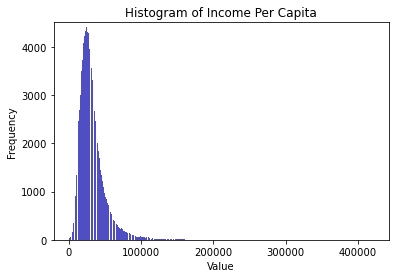

In [20]:
%matplotlib inline
n, bins, patches = plt.hist(x=income, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Income Per Capita')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [ ]:
#incomes are right skewed. This means that the mode of the income is smaller than the mean and median of income.